In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.shape

(144, 2)

In [4]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [5]:
data["Month"] = pd.to_datetime(data["Month"])
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [7]:
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [8]:
# To fill the null values, we can use interpolate method
data.interpolate(method="linear")

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [9]:
data.duplicated().sum()

0

In [10]:
#df.reset_index(drop = True, inplace=True)
#df.head()

data.set_index("Month", inplace=True)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

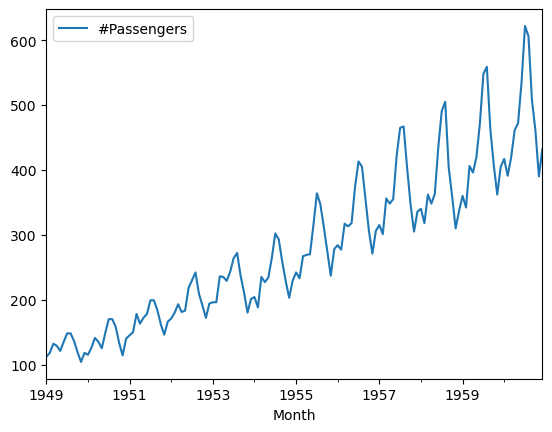

In [11]:
# Plot the time series data
data.plot()

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.seasonal import 

In [14]:
decompose = seasonal_decompose(data)

Figure(640x480)


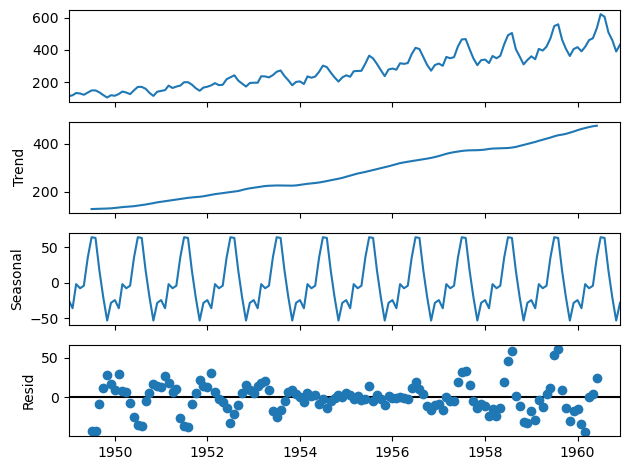

In [15]:
print(decompose.plot())

In [16]:
# Perform AddFullerTest

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
result = adfuller(data)
result

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [19]:
p_value = result[1]
p_value

0.9918802434376411

In [20]:
if p_value > 0.05:
    print("Accept null hypothesis, data is non stationary")
else:
    print("Reject null hypothesis, data is stationary")

Accept null hypothesis, data is non stationary


In [21]:
#Rolling Means
roll_mean = data.rolling(window=12).mean()
roll_std = data.rolling(window=12).std()

In [22]:
roll_mean.head

<bound method NDFrame.head of             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]>

In [23]:
roll_std

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,83.630500
1960-09-01,84.617276
1960-10-01,82.541954


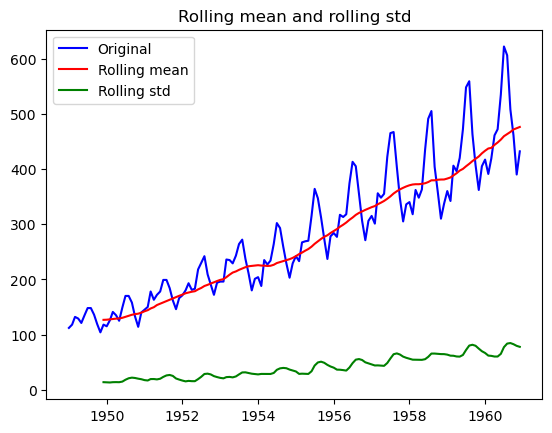

In [24]:
plt.plot(data, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling mean')
plt.plot(roll_std, color='green', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and rolling std')
plt.show()

## Make the data stationary

In [25]:
df_log = np.log(data)
df_log.head()

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791


In [26]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


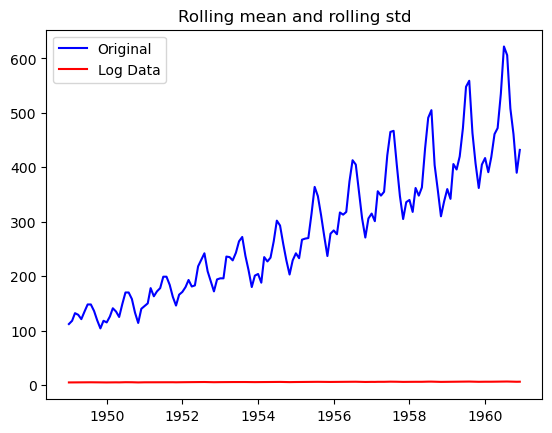

In [27]:
plt.plot(data, color='blue', label='Original')
plt.plot(df_log, color='red', label='Log Data')
plt.legend(loc='best')
plt.title('Rolling mean and rolling std')
plt.show()

In [28]:
df_log_roll_mean = df_log.rolling(window=12).mean()
df_log_roll_std = df_log.rolling(window=12).std()

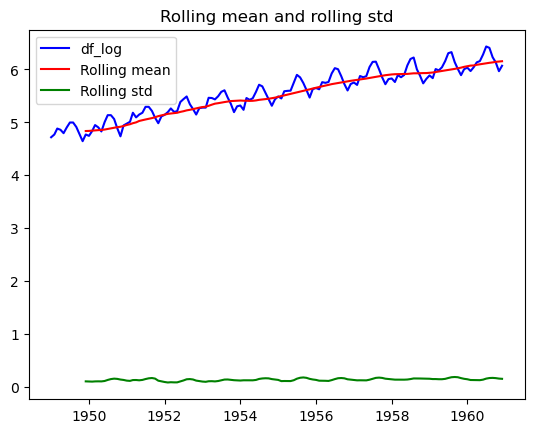

In [29]:
plt.plot(df_log, color='blue', label='df_log')
plt.plot(df_log_roll_mean, color='red', label='Rolling mean')
plt.plot(df_log_roll_std, color='green', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and rolling std')
plt.show()

In [30]:
deTrendingData = df_log - df_log_roll_mean
# we are trying to remove the trending dat from actual data

In [31]:
trend_roll_mean = deTrendingData.rolling(window=12).mean()
trend_roll_std = deTrendingData.rolling(window=12).std()

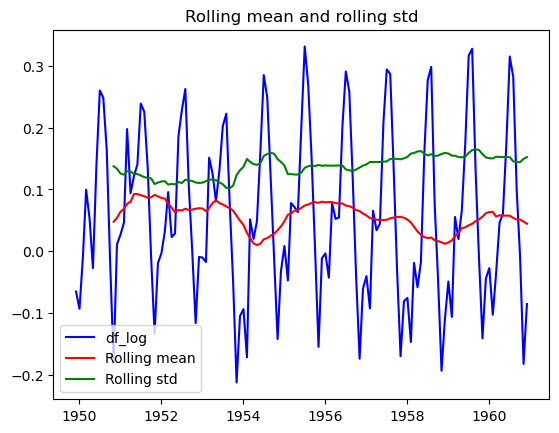

In [32]:
plt.plot(deTrendingData, color='blue', label='df_log')
plt.plot(trend_roll_mean, color='red', label='Rolling mean')
plt.plot(trend_roll_std, color='green', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and rolling std')
plt.show()

In [33]:
deTrendingData.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [34]:
deTrendingData.dropna(inplace=True)

In [35]:
result = adfuller(deTrendingData["#Passengers"])
result

(-3.1629079913008766,
 0.02223463000124264,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -436.63269481747034)

In [36]:
p_value = result[1]
p_value

0.02223463000124264

In [37]:
if p_value > 0.05:
    print("Accept null hypothesis, data is non stationary")
else:
    print("Reject null hypothesis, data is stationary")

Reject null hypothesis, data is stationary


Reject null hypothesis means <B>Means data is non stationary</B>

# Apply ARIMA (Auto Regressive Integrated Moving Average) apply..

In [38]:
# Import 'ARIMA' from 'statsmodels' for building autoregressive models
from statsmodels.tsa.arima.model import ARIMA

In [39]:
#Splitting the data into train and test sets.
df_train = deTrendingData.iloc[:120,:]['#Passengers']   # first 42 months as training data
df_test = deTrendingData.iloc[120:,:]['#Passengers']     # last 6 months as testing data

In [40]:
df_train.shape

(120,)

In [41]:
#model = ARIMA(df_train, order(2, 1, 2))
model = ARIMA(df_train, order=(2, 1, 2))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
model=model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [44]:
deTrendingData['predict']=model.predict(start=120,end=132) #starting and ending index of the test data

<Axes: xlabel='Month'>

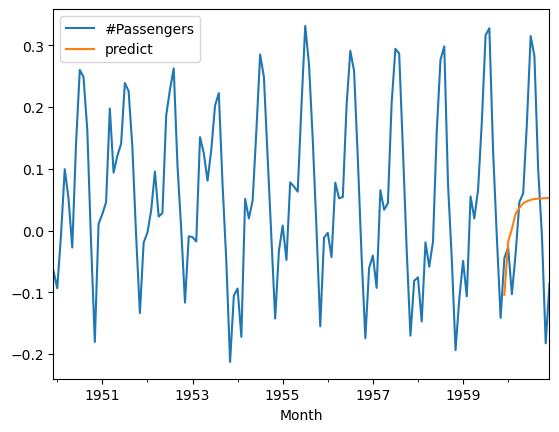

In [45]:
deTrendingData[['#Passengers','predict']].plot()

In [46]:
import itertools

In [47]:
p=range(8)
d=range(1,2)
q=range(8)
pdq_combination=list(itertools.product(p,d,q))
pdq_combination

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 1, 7),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6),
 (6, 1, 7),
 (7, 1, 0),
 (7, 1, 1),
 (7, 1, 2),
 (7, 1, 3),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 6),
 (7, 1, 7)]

In [48]:
len(pdq_combination)

64

In [49]:
from sklearn.metrics import mean_squared_error

In [53]:
rmse=[]
order1=[]
for pdq in pdq_combination:
  model=ARIMA(df_train,order=pdq)
  model_fit=model.fit()
  pred=model_fit.predict(start=len(df_train),end=len(df_train)+len(df_test)-1)
  error=np.sqrt(mean_squared_error(df_test,pred))
  order1.append(pdq)
  rmse.append(error)

results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE'])

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

In [54]:
result

(-3.1629079913008766,
 0.02223463000124264,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -436.63269481747034)

In [55]:
results.sort_values(by='RMSE',ascending=True)

,RMSE
"(7, 1, 7)",0.048850
"(7, 1, 6)",0.057806
"(7, 1, 5)",0.059503
"(6, 1, 6)",0.068879
"(5, 1, 7)",0.070586
...,...
"(2, 1, 0)",0.217930
"(0, 1, 0)",0.228469
"(1, 1, 1)",0.240002
"(0, 1, 1)",0.252661


In [56]:
#optimal value for pdq from itertools is (7,1,7)

In [58]:
model=ARIMA(df_train,order=(7,1,7))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [59]:
model=model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [62]:
deTrendingData['predict']=model_fit.predict(start=len(df_train),end=len(df_train)+len(df_test)-1)

<Axes: xlabel='Month'>

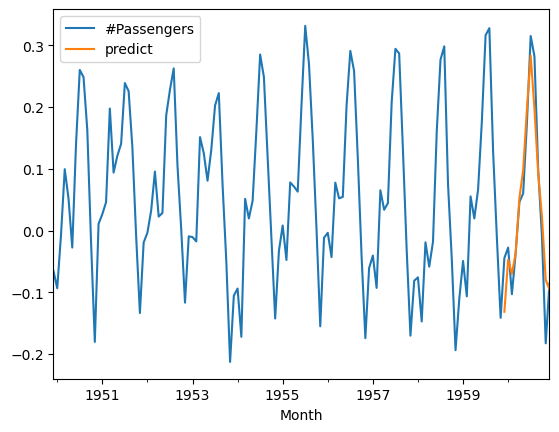

In [63]:
deTrendingData[['#Passengers','predict']].plot()

In [64]:
#Auto arima

In [65]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [66]:
deTrendingData

,#Passengers,predict
Month,,
1949-12-01,-0.065494,NaN
1950-01-01,-0.093449,NaN
1950-02-01,-0.007566,NaN
1950-03-01,0.099416,NaN
1950-04-01,0.052142,NaN
...,...,...
1960-08-01,0.282363,0.197447
1960-09-01,0.098235,0.092435
1960-10-01,-0.009230,0.022620


In [67]:
data_new=deTrendingData.copy()

In [68]:
data_new.drop(columns='predict',axis=1,inplace=True)

In [69]:
data_new

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [70]:
from pmdarima import auto_arima

In [71]:
new_model=auto_arima(data_new,seasonal=True,stepwise=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-277.470, Time=0.82 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-152.169, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-233.989, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-246.526, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-133.698, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-252.154, Time=0.47 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-279.238, Time=0.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-254.090, Time=0.47 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-260.142, Time=0.26 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-277.308, Time=0.85 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-261.472, Time=0.27 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-285.263, Time=0.95 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=-281.669, Time=0.86 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-267.802, Time=1.09 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept

In [72]:
model=ARIMA(df_train,order=(3,0,2))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [73]:
model=model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [75]:
data_new['predict']=model_fit.predict(start=len(df_train),end=len(df_train)+len(df_test)-1)

<Axes: xlabel='Month'>

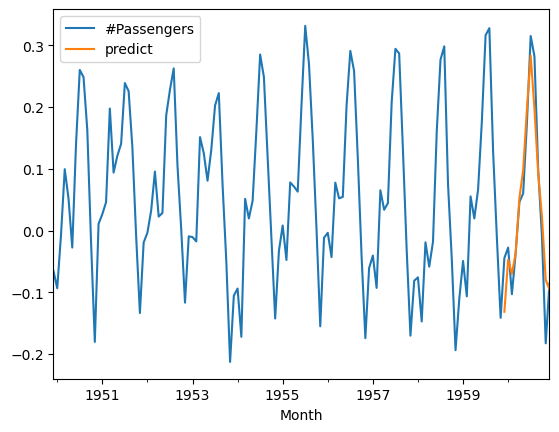

In [76]:
data_new[['#Passengers','predict']].plot()

In [77]:
data_new.tail(13)

,#Passengers,predict
Month,,
1959-12-01,-0.044481,-0.131586
1960-01-01,-0.027530,-0.046987
1960-02-01,-0.103067,-0.070060
1960-03-01,-0.036530,-0.036816
1960-04-01,0.046332,0.052883
1960-05-01,0.060186,0.097898
1960-06-01,0.175033,0.197207
1960-07-01,0.315151,0.283485
1960-08-01,0.282363,0.197447


<Axes: xlabel='Month'>

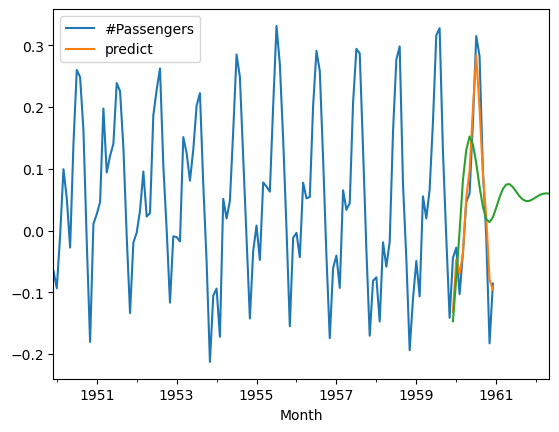

In [78]:
#data_new
forecast=model.forecast(steps=30)
data_new[['#Passengers','predict']].plot()
forecast.plot()

In [79]:
forecast

1959-12-01   -0.146948
1960-01-01   -0.076744
1960-02-01   -0.000992
1960-03-01    0.081480
1960-04-01    0.130511
1960-05-01    0.152252
1960-06-01    0.139443
1960-07-01    0.109505
1960-08-01    0.070774
1960-09-01    0.038631
1960-10-01    0.018263
1960-11-01    0.013701
1960-12-01    0.021404
1961-01-01    0.036987
1961-02-01    0.053850
1961-03-01    0.067440
1961-04-01    0.074634
1961-05-01    0.075192
1961-06-01    0.070453
1961-07-01    0.063063
1961-08-01    0.055612
1961-09-01    0.050172
1961-10-01    0.047705
1961-11-01    0.048180
1961-12-01    0.050743
1962-01-01    0.054203
1962-02-01    0.057399
1962-03-01    0.059532
1962-04-01    0.060279
1962-05-01    0.059775
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='Month'>

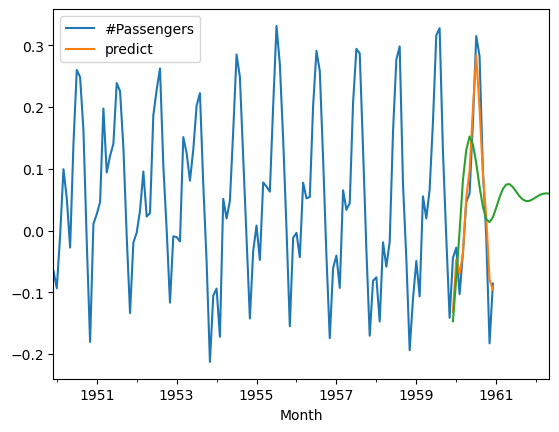

In [81]:
#new_data
forecast=model.forecast(steps=30)
deTrendingData[['#Passengers','predict']].plot()
forecast.plot()

In [82]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [83]:
model=SARIMAX(df_train,order=(7,1,7),seasonal_order=(7,1,7,4))

ValueError: Invalid model: autoregressive lag(s) {4} are in both the seasonal and non-seasonal autoregressive components.